# Анализ данных об оптовых продажах аудиотехники

In [1]:
#импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#читаем файлы
df_orders = pd.read_csv('df_orders.csv')
df_order_status = pd.read_csv('df_order_status.csv')
df_products = pd.read_csv('df_products.csv')


In [6]:
df_orders.head()

,order_id,product_id,quantity,manager,date
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10


In [7]:
df_order_status.head()

,order_id,client_id,status
0,QPLK-54839036,52,confirmed
1,MAQJ-95867467,84,canceled
2,KHLF-51759445,23,confirmed
3,DALF-47566548,97,confirmed
4,BZHU-92977894,29,canceled


In [8]:
df_products.head()

,id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер


In [14]:
#смотрим на тип данных
df_orders.dtypes

order_id      object
product_id     int64
quantity       int64
manager       object
date          object
dtype: object

In [15]:
# переводим колонку date в тип datetime
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_orders.dtypes

order_id              object
product_id             int64
quantity               int64
manager               object
date          datetime64[ns]
dtype: object

## 1. Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

Считаем количество уникальных заказов в каждый день

In [78]:
# сгруппируем данные по дате и посчитаем число уникальных заказов
order = df_orders.groupby('date', as_index=False) \
    .agg({'order_id': 'nunique'}) \
    .sort_values('order_id', ascending=False) \
    .rename(columns={'order_id': 'orders'})
order

,date,orders
13,2024-03-14,34
12,2024-03-13,24
0,2024-03-01,22
28,2024-03-29,19
4,2024-03-05,18
26,2024-03-27,18
25,2024-03-26,17
14,2024-03-15,17
21,2024-03-22,16
18,2024-03-19,15


#### Построим график с количеством заказов по дням недели и определим, заметна ли в данных сезонность
  

In [79]:
#создаем столбец  day_of_week = переводим дату в день недели
order['day_of_week'] = order['date'].dt.day_name()
order

,date,orders,day_of_week
13,2024-03-14,34,Thursday
12,2024-03-13,24,Wednesday
0,2024-03-01,22,Friday
28,2024-03-29,19,Friday
4,2024-03-05,18,Tuesday
26,2024-03-27,18,Wednesday
25,2024-03-26,17,Tuesday
14,2024-03-15,17,Friday
21,2024-03-22,16,Friday
18,2024-03-19,15,Tuesday


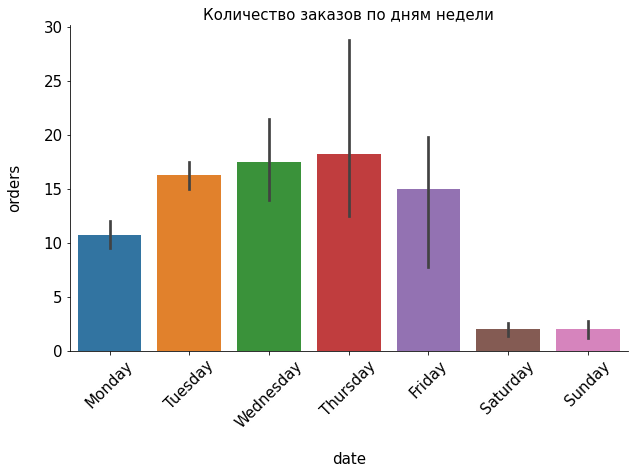

In [80]:
# Создаем список с порядком дней недели
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Создаем barplot
plt.figure(figsize=(10, 6)) # Устанавливаем размер графика
sns.barplot(data=order, x='day_of_week', y='orders', order=days_order)

# Настраиваем метки осей
plt.xlabel("\ndate", fontsize=15)
plt.ylabel("orders\n", fontsize=15)

# Настраиваем параметры метки по оси X и Y
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)

plt.title("Количество заказов по дням недели", fontsize=15)  # Добавляем заголовок

# Убираем верхнюю и правую границы
sns.despine()

#в разрезе дней недели: по выходным почти нет заказов

In [81]:
#посмотрим нет ли выбивающихся дат, где в будни также мало заказов как и в выходные(сб и вс)

order.query('day_of_week != "Saturday" and day_of_week != "Sunday"').sort_values('date')

,date,orders,day_of_week
0,2024-03-01,22,Friday
3,2024-03-04,10,Monday
4,2024-03-05,18,Tuesday
5,2024-03-06,14,Wednesday
6,2024-03-07,14,Thursday
7,2024-03-08,1,Friday
10,2024-03-11,12,Monday
11,2024-03-12,15,Tuesday
12,2024-03-13,24,Wednesday
13,2024-03-14,34,Thursday


#### 8 марта пятница мало заказов - праздничный день

#### Посмотрим на дату с наибольшим кол-вом заказов (2024-03-14) Нужно выяснить почему такой всплеск

In [93]:
#Объединим df и пересохраним файл 
orders_status = pd.merge(df_orders, df_order_status, on='order_id', how='left')
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed
...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed


In [94]:
orders_status.to_csv('orders_status.csv', index=False)

#### Начнем со статусов заказа. Посмотрим на количество и соотношение подтвержденных и отмененных заказов

In [95]:
# удаленим дубликаты
no_dubl = orders_status[['status', 'order_id']].drop_duplicates()
no_dubl

#из 4603 строк осталось 346

,status,order_id
0,confirmed,QPLK-54839036
8,canceled,MAQJ-95867467
20,confirmed,KHLF-51759445
35,confirmed,DALF-47566548
55,canceled,BZHU-92977894
...,...,...
4539,confirmed,SOCT-63427141
4558,confirmed,HLDH-41146746
4571,confirmed,IZFC-94335845
4580,confirmed,CUDB-19668701


In [96]:
#группируем по статусу и считаем кол-во заказов по каждому статусу
status_counts = no_dubl.groupby('status', as_index=False) \
    .agg({'order_id': 'count'})
status_counts

,status,order_id
0,canceled,37
1,confirmed,309


In [97]:
#доля подтвержденных и отмененных заказов
no_dubl[['order_id', 'status']].drop_duplicates().status.value_counts(normalize=True).round(2)

confirmed    0.89
canceled     0.11
Name: status, dtype: float64

####  Посчитаем количество подтвержденных и отмененных заказов на каждую дату. Определим, в какой день не было ни одного подтвержденного заказа. 


In [98]:
#посчитаем кол-во уник.заказов в разбивке по дате и статусу
orders_2 = orders_status.groupby(['date', 'status']) \
    .agg({'order_id': 'nunique'}).reset_index() \
    .rename(columns={'order_id': 'unique_orders'})
orders_2

,date,status,unique_orders
0,2024-03-01,canceled,2
1,2024-03-01,confirmed,20
2,2024-03-02,confirmed,2
3,2024-03-03,confirmed,1
4,2024-03-04,confirmed,10
5,2024-03-05,confirmed,18
6,2024-03-06,canceled,1
7,2024-03-06,confirmed,13
8,2024-03-07,canceled,1
9,2024-03-07,confirmed,13


In [99]:
#нет ни одного подтвержденного заказа
orders = orders_status.groupby(['date', 'status'], as_index=False) \
    .agg({'order_id': 'nunique'}) \
    .pivot(index='date', columns='status', values='order_id').fillna(0).astype(int) \
    .query('confirmed == 0') #фильтруем 
orders

status,canceled,confirmed
date,,
2024-03-09,1,0


#### Построим график с заказами по дням в разбивке по статусу заказа. 
Посмотрим подробнее на день с наибольшим числом заказов (вместе и подтвержденных, и отменных), который мы определили ранее, и на день, предшествующий ему.


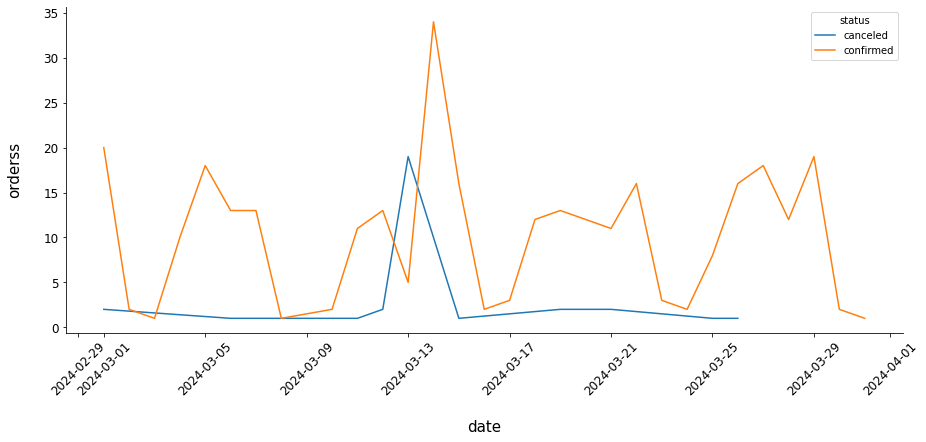

In [100]:
#построим линейный график
plt.figure(figsize=(15,6)) # Устанавливаем размер графика

sns.lineplot(data=orders_2, x='date', y ='unique_orders', hue = 'status')

plt.xlabel("\ndate", fontsize=15)
plt.ylabel("orderss\n", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

sns.despine()

Выводы: 
1. В день с наибольшим числом заказов было много успешно оформленных заказов
2. В день, предшествующий дню с наибольшим числом заказов, было много отмен

#### Рассмотрим эти два дня отдельно (день с наибольшим числом заказов, который мы определили ранее, и день, предшествующий ему) 


In [101]:
#отберем все отмененные заказы 13 марта

canceled_2024_03_13 = orders_status.query('status == "canceled" and date == "2024-03-13"') \
    .groupby('order_id') \
    .agg({'product_id': 'nunique',
          'quantity': 'sum',
          'manager': 'max',
          'client_id': 'max'
         }).reset_index()

canceled_2024_03_13.rename(columns={
    'product_id': 'unique_products_canceled',
    'quantity': 'total_quantity_canceled',
    'manager': 'manager_canceled',
    'client_id': 'client_canceled'}, inplace=True)

canceled_2024_03_13

,order_id,unique_products_canceled,total_quantity_canceled,manager_canceled,client_canceled
0,AFIH-00611801,11,192,Алексей Саксофонов,43
1,BBFJ-27674101,14,294,Ксения Балалайкина,73
2,CLBQ-63032648,13,205,Виктор Тромбонов,60
3,CYJY-07359557,13,316,Екатерина Тарелкина,56
4,GHGB-88045656,4,42,Ксения Балалайкина,7
5,JEIF-69283221,15,207,Виктор Тромбонов,94
6,JQQO-28609300,15,252,Виктор Тромбонов,93
7,KJJS-03491897,18,399,Алексей Саксофонов,66
8,MIGZ-68487439,17,325,Алексей Саксофонов,51
9,NBIO-35476164,14,319,Виктор Тромбонов,95


In [102]:
canceled_2024_03_13.shape

(19, 5)

In [103]:
#отберем все подтвержденные заказы 14 марта
confirmed_2024_03_14 = orders_status.query('status == "confirmed" and date == "2024-03-14"') \
    .groupby('order_id') \
    .agg({'product_id': 'nunique', # Количество уникальных товаров
          'quantity': 'sum', # Сумма единиц всех товаров
          'manager': 'max', #Менеджер
          'client_id': 'max'
         }).reset_index()
    
confirmed_2024_03_14.rename(columns={
    'product_id': 'unique_products_confirmed',
    'quantity': 'total_quantity_confirmed',
    'manager': 'manager_confirmed',
    'client_id': 'client_confirmed'}, inplace=True)
confirmed_2024_03_14

,order_id,unique_products_confirmed,total_quantity_confirmed,manager_confirmed,client_confirmed
0,ACXS-56511429,8,177,Алексей Саксофонов,24
1,AUZX-12706022,19,369,Екатерина Тарелкина,83
2,BCMM-97072924,17,325,Алексей Саксофонов,51
3,BGHE-44722549,8,149,Виктор Тромбонов,95
4,DMEB-71700015,12,190,Сергей Контрабасов,93
5,DOJS-07233317,16,277,Маргарита Камертонова,56
6,EJHJ-34261015,20,319,Максим Барабанов,87
7,EPBF-14743479,15,207,Виктор Тромбонов,94
8,EZAA-08394172,9,176,Анастасия Дудкина,39
9,FDEB-71487438,11,192,Алексей Саксофонов,43


In [104]:
'''Объединим эти заказы по совпадающим характеристикам: имя менеджера, id клиента, число уникальных товаров в заказе
и общее число товаров в штуках. То есть попробуем найти заказы, которые отменили в первый день и оформили заново на следующий'''

merged_orders = pd.merge(
    canceled_2024_03_13,
    confirmed_2024_03_14,
    left_on=['manager_canceled', 'client_canceled', 'unique_products_canceled', 'total_quantity_canceled'],
    right_on=['manager_confirmed', 'client_confirmed', 'unique_products_confirmed', 'total_quantity_confirmed'],
    how='inner',
)
merged_orders

,order_id_x,unique_products_canceled,total_quantity_canceled,manager_canceled,client_canceled,order_id_y,unique_products_confirmed,total_quantity_confirmed,manager_confirmed,client_confirmed
0,AFIH-00611801,11,192,Алексей Саксофонов,43,FDEB-71487438,11,192,Алексей Саксофонов,43
1,BBFJ-27674101,14,294,Ксения Балалайкина,73,UETB-44283966,14,294,Ксения Балалайкина,73
2,CLBQ-63032648,13,205,Виктор Тромбонов,60,IECD-18739530,13,205,Виктор Тромбонов,60
3,CYJY-07359557,13,316,Екатерина Тарелкина,56,WNMY-98871151,13,316,Екатерина Тарелкина,56
4,GHGB-88045656,4,42,Ксения Балалайкина,7,JUGG-73806170,4,42,Ксения Балалайкина,7
5,JEIF-69283221,15,207,Виктор Тромбонов,94,EPBF-14743479,15,207,Виктор Тромбонов,94
6,JQQO-28609300,15,252,Виктор Тромбонов,93,OWZC-14247946,15,252,Виктор Тромбонов,93
7,KJJS-03491897,18,399,Алексей Саксофонов,66,GRCH-73394464,18,399,Алексей Саксофонов,66
8,MIGZ-68487439,17,325,Алексей Саксофонов,51,BCMM-97072924,17,325,Алексей Саксофонов,51
9,NBIO-35476164,14,319,Виктор Тромбонов,95,NFML-87752700,14,319,Виктор Тромбонов,95


In [105]:
#Посчитаем долю заказов, которые были перезаказаны 14 марта, от всех подтвержденных 14 марта заказов
merged_orders.shape[0] /confirmed_2024_03_14.shape[0]

0.47058823529411764

#### Видимо произошел сбой в работе системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние

## 2. Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

**У нас есть данные за целый месяц, поэтому посчитаем ключевые метрики этого месяца.**  цена единицы товара указана в долларах США, потому что закупаем их в долларах, но продаем товары за российские рубли (по тому курсу, который установил Центробанк на дату продажи), метрики посчитаем в рублях. 

In [106]:
# Откроем файл usd_rate.txt с данными с курсом доллара США на каждую дату

with open('usd_rate.txt') as file:
    currency = file.readlines() #Чтение строк из файла:  метод readlines(), чтобы получить все строки файла в виде списка
print(currency)

['2024-03-01,90.8423,Доллар США\n', '2024-03-02,91.3336,Доллар США\n', '2024-03-03,91.3336,Доллар США\n', '2024-03-04,91.3336,Доллар США\n', '2024-03-05,91.3534,Доллар США\n', '2024-03-06,91.1604,Доллар США\n', '2024-03-07,90.3412,Доллар США\n', '2024-03-08,90.7493,Доллар США\n', '2024-03-09,90.7493,Доллар США\n', '2024-03-10,90.7493,Доллар США\n', '2024-03-11,90.7493,Доллар США\n', '2024-03-12,90.6252,Доллар США\n', '2024-03-13,90.8818,Доллар США\n', '2024-03-14,91.5449,Доллар США\n', '2024-03-15,91.6359,Доллар США\n', '2024-03-16,91.87,Доллар США\n', '2024-03-17,91.87,Доллар США\n', '2024-03-18,91.87,Доллар США\n', '2024-03-19,91.9829,Доллар США\n', '2024-03-20,92.2243,Доллар США\n', '2024-03-21,92.6861,Доллар США\n', '2024-03-22,91.9499,Доллар США\n', '2024-03-23,92.6118,Доллар США\n', '2024-03-24,92.6118,Доллар США\n', '2024-03-25,92.6118,Доллар США\n', '2024-03-26,92.7761,Доллар США\n', '2024-03-27,92.5745,Доллар США\n', '2024-03-28,92.5919,Доллар США\n', '2024-03-29,92.2628,Долла

In [107]:
#создаем из списка датафрейм
df_currency = pd.DataFrame(currency, columns=['info'])
df_currency.head()

,info
0,"2024-03-01,90.8423,Доллар США\n"
1,"2024-03-02,91.3336,Доллар США\n"
2,"2024-03-03,91.3336,Доллар США\n"
3,"2024-03-04,91.3336,Доллар США\n"
4,"2024-03-05,91.3534,Доллар США\n"


In [108]:
# Разделяем строку по символу ':' и создаем новые колонки
df_currency[['date', 'currency', 'currency_rate']] = df_currency['info'].str.split(',', expand=True)
df_currency.head()

,info,date,currency,currency_rate
0,"2024-03-01,90.8423,Доллар США\n",2024-03-01,90.8423,Доллар США\n
1,"2024-03-02,91.3336,Доллар США\n",2024-03-02,91.3336,Доллар США\n
2,"2024-03-03,91.3336,Доллар США\n",2024-03-03,91.3336,Доллар США\n
3,"2024-03-04,91.3336,Доллар США\n",2024-03-04,91.3336,Доллар США\n
4,"2024-03-05,91.3534,Доллар США\n",2024-03-05,91.3534,Доллар США\n


In [109]:
# Удаляем исходную колонку 'info'
df_currency.drop(columns=['info'], inplace=True)
df_currency.head()

,date,currency,currency_rate
0,2024-03-01,90.8423,Доллар США\n
1,2024-03-02,91.3336,Доллар США\n
2,2024-03-03,91.3336,Доллар США\n
3,2024-03-04,91.3336,Доллар США\n
4,2024-03-05,91.3534,Доллар США\n


In [110]:
# Преобразуем колонку 'currency_rate' в числовой формат
df_currency['currency'] = df_currency['currency'].astype(float)
df_currency['date'] = pd.to_datetime(df_currency['date'])
df_currency.dtypes

date             datetime64[ns]
currency                float64
currency_rate            object
dtype: object

In [111]:
#среднее знач курса доллара
df_currency.currency.mean().round(2)

91.7

#### Посчитаем общую выручку

In [112]:
#объединим датафреймы

df_full = pd.merge(orders_status, df_products, left_on='product_id', right_on='id')
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика
1,YQDE-00869611,489,10,Алексей Саксофонов,2024-03-12,20,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика
2,KBOO-97036112,489,18,Алексей Саксофонов,2024-03-19,24,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика
3,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика
4,PZUZ-70017989,594,18,Надежда Гармошкина,2024-03-01,33,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика


In [113]:
#к предыдущему df добавим информацию о курсе доллара на каждую дату
df_full = pd.merge(df_full, df_currency, on='date', how='left')
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency,currency_rate
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,Доллар США\n
1,YQDE-00869611,489,10,Алексей Саксофонов,2024-03-12,20,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.6252,Доллар США\n
2,KBOO-97036112,489,18,Алексей Саксофонов,2024-03-19,24,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,91.9829,Доллар США\n
3,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,Доллар США\n
4,PZUZ-70017989,594,18,Надежда Гармошкина,2024-03-01,33,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.8423,Доллар США\n


In [114]:
#создадим колонку price_rub с ценами в рублях (price*currency_rate)
#создадим колонку revenue с выручкой (price_rub*quantity)
df_full['price_rub'] = df_full['price'] * df_full['currency']
df_full['revenue'] = df_full['price_rub'] * df_full['quantity']
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,Доллар США\n,26384.451482,290228.966302
1,YQDE-00869611,489,10,Алексей Саксофонов,2024-03-12,20,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.6252,Доллар США\n,26348.370648,263483.706480
2,KBOO-97036112,489,18,Алексей Саксофонов,2024-03-19,24,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,91.9829,Доллар США\n,26743.108346,481375.950228
3,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,Доллар США\n,27392.676205,164356.057230
4,PZUZ-70017989,594,18,Надежда Гармошкина,2024-03-01,33,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.8423,Доллар США\n,27420.748255,493573.468590


In [115]:
#отбераем только записи с подтвержденными заказами
df_confirmed = df_full.query('status == "confirmed"')
df_confirmed.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,Доллар США\n,26384.451482,290228.966302
1,YQDE-00869611,489,10,Алексей Саксофонов,2024-03-12,20,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.6252,Доллар США\n,26348.370648,263483.706480
2,KBOO-97036112,489,18,Алексей Саксофонов,2024-03-19,24,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,91.9829,Доллар США\n,26743.108346,481375.950228
3,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,Доллар США\n,27392.676205,164356.057230
4,PZUZ-70017989,594,18,Надежда Гармошкина,2024-03-01,33,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.8423,Доллар США\n,27420.748255,493573.468590


In [116]:
#считаем общую выручку по подтв.заказам
df_confirmed.revenue.sum().round(2)

2038231821.56

**Посчитаем средний чек в этом месяце (в рублях)**

In [118]:
#найдем кол-во уник. заказы
uniq_orders = df_confirmed.order_id.nunique()
revenue_sum  = df_confirmed.revenue.sum()
aver_check = round((revenue_sum/uniq_orders), 2)
aver_check

6596219.49

## 3. Ключевые метрики месяца посчитали, теперь посмотрим на их динамику внутри месяца: выручку, средний чек и число заказов — на каждый день

In [119]:
# посчитаем выручку
df_report_by_date = df_confirmed.groupby('date', as_index=False) \
    .agg({'order_id': 'nunique', 'revenue': 'sum'}) \
    .rename(columns={'order_id': 'orders'})
df_report_by_date.head()

,date,orders,revenue
0,2024-03-01,20,1.554118e+08
1,2024-03-02,2,1.197167e+07
2,2024-03-03,1,2.548418e+06
3,2024-03-04,10,6.404993e+07
4,2024-03-05,18,8.952724e+07


In [120]:
#посчитаем средний чек
df_report_by_date['average_check'] = df_report_by_date['revenue'] / df_report_by_date['orders']
df_report_by_date.round(2).head()

,date,orders,revenue,average_check
0,2024-03-01,20,1.554118e+08,7770587.80
1,2024-03-02,2,1.197167e+07,5985834.26
2,2024-03-03,1,2.548418e+06,2548418.42
3,2024-03-04,10,6.404993e+07,6404992.56
4,2024-03-05,18,8.952724e+07,4973735.46


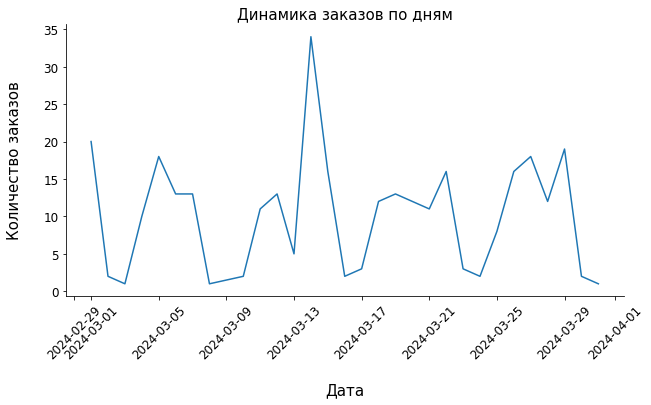

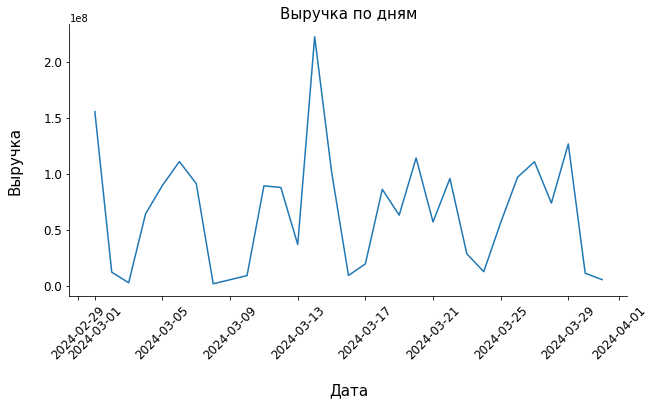

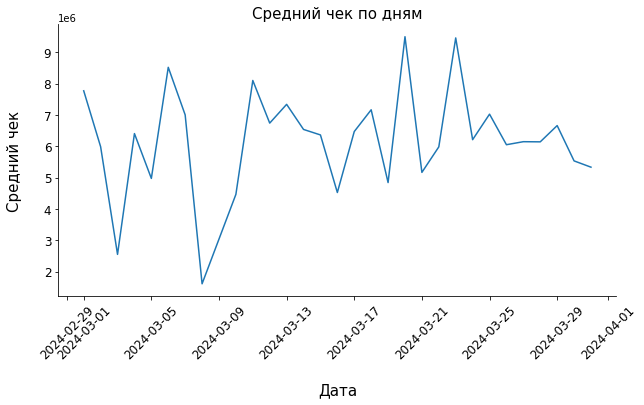

In [121]:
#построим линейные графики

#Динамика заказов по дням
plt.figure(figsize=(10,5))
sns.lineplot(data=df_report_by_date, x=df_report_by_date.date, y=df_report_by_date.orders)

plt.title("Динамика заказов по дням", fontsize=15 )
plt.xlabel("\nДата", fontsize=15)
plt.ylabel("Количество заказов\n", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

sns.despine()

#Выручка по дням
plt.figure(figsize=(10,5))
sns.lineplot(data=df_report_by_date, x=df_report_by_date.date, y=df_report_by_date.revenue)

plt.title("Выручка по дням", fontsize=15 )
plt.xlabel("\nДата", fontsize=15)
plt.ylabel("Выручка\n", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

sns.despine()


#Выручка по дням
plt.figure(figsize=(10,5))
sns.lineplot(data=df_report_by_date, x=df_report_by_date.date, y=df_report_by_date.average_check)

plt.title("Средний чек по дням", fontsize=15 )
plt.xlabel("\nДата", fontsize=15)
plt.ylabel("Средний чек\n", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

sns.despine()

Выводы:
1. число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла)
2. средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла)
3. в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение
4. с течением времени выручка то увеличивается, то уменьшается
5. на протяжении всего месяца средний чек то увеличивается, то уменьшается

## 4. Проанализируем интерес клиентов к брендам

In [124]:
#создадим новую колонку brand, в которую поместим названия брендов. в колонке name сначала идет бренд, модель товара
df_full['brand'] = df_full['name'].str.split(',', expand=True)[0]
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency,currency_rate,price_rub,revenue,brand
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,Доллар США\n,26384.451482,290228.966302,Heco
1,YQDE-00869611,489,10,Алексей Саксофонов,2024-03-12,20,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.6252,Доллар США\n,26348.370648,263483.706480,Heco
2,KBOO-97036112,489,18,Алексей Саксофонов,2024-03-19,24,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,91.9829,Доллар США\n,26743.108346,481375.950228,Heco
3,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,Доллар США\n,27392.676205,164356.057230,JBL
4,PZUZ-70017989,594,18,Надежда Гармошкина,2024-03-01,33,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.8423,Доллар США\n,27420.748255,493573.468590,JBL


In [125]:
df_full['brand'].nunique()  #количество уникальных брендов

121

 **Определим, какой бренд принес наибольшую выручку.**


In [127]:
#отбираем подтвержденные заказы
revenue_brand = df_full.query('status == "confirmed"') \
    .groupby('brand')\
    .agg({'revenue': 'sum', 'order_id': 'nunique'}) \
    .sort_values(['revenue', 'order_id'], ascending=False)
revenue_brand
#JBL принес наибольшую выручку

,revenue,order_id
brand,,
JBL,2.665961e+08,264
Heco,2.388163e+08,229
Klipsch,2.039024e+08,205
Yamaha,1.658651e+08,218
KEF,1.465101e+08,73
...,...,...
AudioSource,3.388167e+04,1
Fosi Audio,3.129419e+04,1
ART,2.670040e+04,2


У одних брендов большинство товаров востребовано клиентами, а у других — клиенты заказывают только небольшую часть товаров, а остальные зря занимают виртуальную «полку» в перечне товаров, продаваемых компанией. **Нужно определить, какие бренды редко попадают в заказы, хотя товаров таких брендов на самом деле много.**


In [128]:
# Сохраниv в список products_in_orders уникальные идентификаторы товаров из датафрейма df_confirmed.
products_in_orders = df_confirmed['product_id'].unique().tolist()
products_in_orders

[489,
 594,
 670,
 469,
 1302,
 1309,
 134,
 1659,
 317,
 1565,
 1039,
 1613,
 1354,
 570,
 306,
 495,
 1392,
 624,
 567,
 383,
 640,
 1484,
 225,
 1325,
 504,
 513,
 998,
 75,
 707,
 763,
 617,
 1023,
 1189,
 1315,
 1367,
 676,
 491,
 992,
 322,
 1286,
 1518,
 800,
 817,
 478,
 1352,
 644,
 312,
 1266,
 1573,
 1251,
 1250,
 39,
 566,
 514,
 630,
 452,
 1657,
 1457,
 347,
 1383,
 519,
 1171,
 465,
 138,
 1311,
 208,
 1057,
 457,
 1637,
 601,
 922,
 1651,
 354,
 671,
 975,
 1293,
 1100,
 1394,
 380,
 189,
 793,
 787,
 379,
 1191,
 920,
 1186,
 722,
 1072,
 527,
 313,
 643,
 1546,
 1585,
 217,
 870,
 1422,
 238,
 1054,
 799,
 1520,
 1257,
 559,
 218,
 481,
 1129,
 1208,
 1547,
 474,
 555,
 752,
 550,
 877,
 278,
 750,
 659,
 464,
 235,
 987,
 1379,
 160,
 1552,
 446,
 532,
 77,
 207,
 775,
 577,
 123,
 810,
 1158,
 1183,
 1586,
 508,
 635,
 1050,
 1051,
 21,
 772,
 1378,
 933,
 1645,
 1596,
 648,
 1413,
 1472,
 202,
 835,
 1272,
 821,
 360,
 1625,
 778,
 538,
 1550,
 11,
 588,
 1461,
 49

In [129]:
#cоздаем новую колонку is_in_orders с помощью apply
#значение yes, если значение из колонки id этого датафрейма есть в списке products_in_orders
df_products['is_in_orders'] = df_products['id'].apply(lambda x: 'yes' if x in products_in_orders else 'no')
df_products.head()

,id,name,price,category,is_in_orders
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер,yes
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер,yes
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер,yes
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер,yes
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер,yes


In [130]:
#посчитаем количество встречающихся значений yes и no в колонке is_in_orders.
df_products.is_in_orders.value_counts()

yes    1180
no      497
Name: is_in_orders, dtype: int64

Примерно треть товаров не была заказана ни разу в этом месяце. Посмотрим на эти данные в разрезе по брендам. **Определим, у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда.** Но не берем в расчет бренды, которые представлены маленьким числом товаров (меньше 15), они не захламляют виртуальную «полку».

In [131]:
# создадим колонку бренд
df_products['brand'] = df_products['name'].apply(lambda x: x.split(',')[0])
df_products.head()

,id,name,price,category,is_in_orders,brand
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер,yes,Denon
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер,yes,Denon
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер,yes,Denon
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер,yes,Denon
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер,yes,Denon


In [132]:
#посчитаем по брендам кол-во заказанных и незаказанных товаров
brand_top = df_products.groupby(['brand', 'is_in_orders'], as_index=False)\
    .agg({'id': 'nunique'})\
    .rename(columns={'id': 'products'}) \
    .pivot(index='brand', columns='is_in_orders', values='products').fillna(0).reset_index()

brand_top.head()
#у бренда AKG 6 моделей ни разу не заказали, 5 заказали

is_in_orders,brand,no,yes
0,AKG,6.0,5.0
1,ART,0.0,1.0
2,ASUS,1.0,2.0
3,Adam Audio,1.0,0.0
4,Amazon,0.0,4.0


In [133]:
# Посчитаем общее число товаров для каждого бренда, сложив значения в колонках yes и no.
brand_top['total_orders'] = brand_top['no'] + brand_top['yes']
brand_top.head()

is_in_orders,brand,no,yes,total_orders
0,AKG,6.0,5.0,11.0
1,ART,0.0,1.0,1.0
2,ASUS,1.0,2.0,3.0
3,Adam Audio,1.0,0.0,1.0
4,Amazon,0.0,4.0,4.0


In [134]:
#Для каждого бренда посчитаем долю ни разу не заказанных товаров от всех продаваемых товаров этого бренда.
brand_top['no_orders'] = brand_top['no'] / brand_top['total_orders']
brand_top.head()

is_in_orders,brand,no,yes,total_orders,no_orders
0,AKG,6.0,5.0,11.0,0.545455
1,ART,0.0,1.0,1.0,0.000000
2,ASUS,1.0,2.0,3.0,0.333333
3,Adam Audio,1.0,0.0,1.0,1.000000
4,Amazon,0.0,4.0,4.0,0.000000


In [135]:
#Отберем только те бренды, где общее число товаров больше 15 и доля ни разу не заказанных товаров больше половины (0.5).
brand_top.query('total_orders >15 and no_orders > 0.5')

is_in_orders,brand,no,yes,total_orders,no_orders
32,Dali,49.0,18.0,67.0,0.731343
60,KEF,54.0,28.0,82.0,0.658537
77,Marantz,19.0,3.0,22.0,0.863636
94,Pioneer,70.0,33.0,103.0,0.679612


## 5. Составим отчет по продажам менеджеров

**Сделаем отчет по сделкам каждого менеджера**: сколько он оформил подтвержденных заказов и какую выручку они принесли. Но в абсолютных числах вклад каждого сотрудника может быть непонятен. **Поэтому посчитаем значения в процентах: какой % выручки от общей выручки за месяц приходится на каждого менеджера, и какой % заказов от общего числа заказов.**


In [136]:
# берем данные с подтвержденными заказами по менеджерам и посчитаем для каждого сумму выручки и количество заказов
info_managers = df_confirmed.groupby('manager') \
    .agg({'revenue': 'sum', 'order_id': 'nunique'}) \
    .rename(columns={'order_id': 'orders'})\
    .sort_values('revenue', ascending=False) \
    .reset_index()
info_managers

,manager,revenue,orders
0,Маргарита Камертонова,3.473886e+08,48
1,Виктор Тромбонов,3.188999e+08,50
2,Максим Барабанов,2.401478e+08,40
3,Владимир Ударников,2.084865e+08,31
4,Алексей Саксофонов,1.953435e+08,27
5,Ксения Балалайкина,1.817621e+08,27
6,Екатерина Тарелкина,1.781576e+08,28
7,Надежда Гармошкина,1.347836e+08,21
8,Анастасия Дудкина,1.234504e+08,20
9,Антон Скрипкин,5.150268e+07,7


In [137]:
#Посчитаем процент выручки, приходящейся на каждого менеджера
total_sum = info_managers.revenue.sum() #тотал по выручке по всем менеджерам

info_managers['per_rev'] = (info_managers.revenue / total_sum * 100).round(2)
info_managers

,manager,revenue,orders,per_rev
0,Маргарита Камертонова,3.473886e+08,48,17.04
1,Виктор Тромбонов,3.188999e+08,50,15.65
2,Максим Барабанов,2.401478e+08,40,11.78
3,Владимир Ударников,2.084865e+08,31,10.23
4,Алексей Саксофонов,1.953435e+08,27,9.58
5,Ксения Балалайкина,1.817621e+08,27,8.92
6,Екатерина Тарелкина,1.781576e+08,28,8.74
7,Надежда Гармошкина,1.347836e+08,21,6.61
8,Анастасия Дудкина,1.234504e+08,20,6.06
9,Антон Скрипкин,5.150268e+07,7,2.53


In [138]:
#Посчитаем процент заказов, приходящихся на каждого менеджера
total_orders = info_managers.orders.sum() #тотал по выручке по всем менеджерам

info_managers['per_orders'] = (info_managers.orders / total_orders * 100).round(2)
info_managers

,manager,revenue,orders,per_rev,per_orders
0,Маргарита Камертонова,3.473886e+08,48,17.04,15.53
1,Виктор Тромбонов,3.188999e+08,50,15.65,16.18
2,Максим Барабанов,2.401478e+08,40,11.78,12.94
3,Владимир Ударников,2.084865e+08,31,10.23,10.03
4,Алексей Саксофонов,1.953435e+08,27,9.58,8.74
5,Ксения Балалайкина,1.817621e+08,27,8.92,8.74
6,Екатерина Тарелкина,1.781576e+08,28,8.74,9.06
7,Надежда Гармошкина,1.347836e+08,21,6.61,6.80
8,Анастасия Дудкина,1.234504e+08,20,6.06,6.47
9,Антон Скрипкин,5.150268e+07,7,2.53,2.27


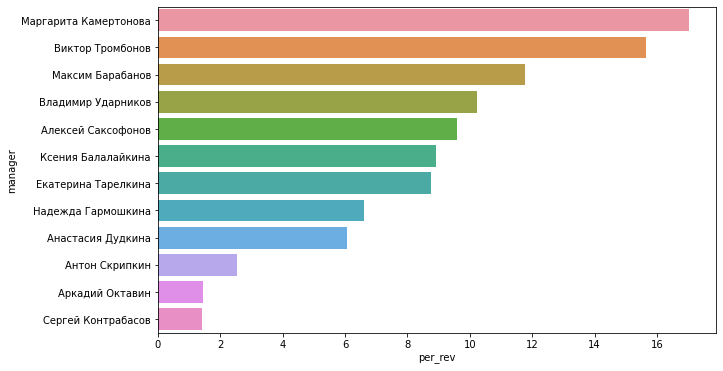

In [139]:
#визуализируем % выручки от общей приходится на каждого менеджера
plt.figure(figsize=(10, 6)) # Устанавливаем размер графика
sns.barplot(data = info_managers, x = 'per_rev', y = 'manager')

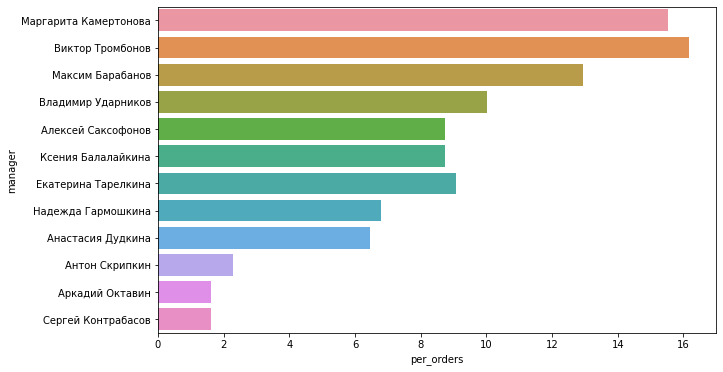

In [140]:
#визуализируем % заказов от общего числа приходится на каждого менеджера
plt.figure(figsize=(10, 6)) # Устанавливаем размер графика
sns.barplot(data = info_managers, x = 'per_orders', y = 'manager')

Выводы:

1. лучшим менеджером по % выручки стала Маргарита Камертонова
2. в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных
3. лидер по % заказов реализовал более 16% заказов
4. наихудшие показатели у Сергея Контрабасова
5. Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина